In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator # Data Augmentation package
from keras.utils import img_to_array, array_to_img, load_img

In [4]:
# load an image for data augmentation
image_file = '/content/dog.jpg'
dog_image = keras.preprocessing.image.load_img(image_file)
dog_array = keras.preprocessing.image.img_to_array(dog_image)
dog = dog_array.reshape((1,)+dog_array.shape)
dog

array([[[[ 27.,  20.,  10.],
         [ 25.,  18.,   8.],
         [ 24.,  17.,   7.],
         ...,
         [ 25.,  19.,   7.],
         [ 32.,  26.,  14.],
         [ 38.,  32.,  20.]],

        [[ 35.,  29.,  17.],
         [ 32.,  26.,  14.],
         [ 30.,  24.,  12.],
         ...,
         [ 35.,  29.,  17.],
         [ 41.,  35.,  23.],
         [ 45.,  39.,  27.]],

        [[ 49.,  43.,  31.],
         [ 47.,  41.,  29.],
         [ 45.,  39.,  27.],
         ...,
         [ 52.,  46.,  32.],
         [ 57.,  51.,  37.],
         [ 61.,  55.,  41.]],

        ...,

        [[166., 168., 165.],
         [166., 168., 165.],
         [167., 167., 165.],
         ...,
         [190., 192., 189.],
         [191., 193., 190.],
         [192., 194., 191.]],

        [[167., 169., 166.],
         [167., 169., 166.],
         [168., 168., 166.],
         ...,
         [190., 192., 189.],
         [191., 193., 190.],
         [192., 194., 191.]],

        [[168., 170., 167.],
       

In [7]:
dog.shape

(1, 1080, 1920, 3)

In [5]:
dog_array.shape

(1080, 1920, 3)

In [14]:
def plot_images(original_image, updated_images):
  plt.figure(figsize=(15,8))
  # original image
  plt.subplot(1,2,1)
  plt.title("Original Image")
  plt.imshow(original_image)

  # Transformed Image
  plt.subplot(1,2,2)
  plt.title("Transformed Image")
  plt.imshow(updated_images)

  plt.show()

# Filp an Image

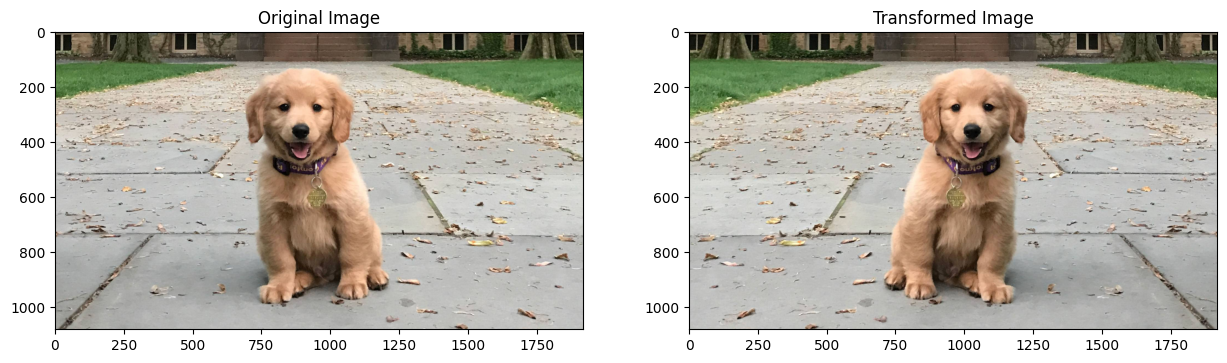

In [17]:
transformed_fn = keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True)
transformed_array = transformed_fn.random_transform(dog_array)
transformed_image = keras.preprocessing.image.array_to_img(transformed_array)
plot_images(dog_image, transformed_image)

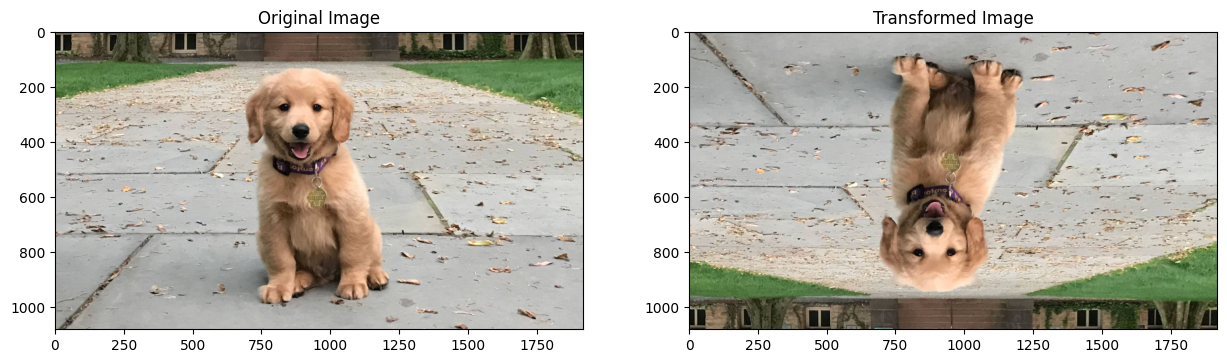

In [18]:
transformed_fn = keras.preprocessing.image.ImageDataGenerator(vertical_flip=True)
transformed_array = transformed_fn.random_transform(dog_array)
transformed_image = keras.preprocessing.image.array_to_img(transformed_array)
plot_images(dog_image, transformed_image)

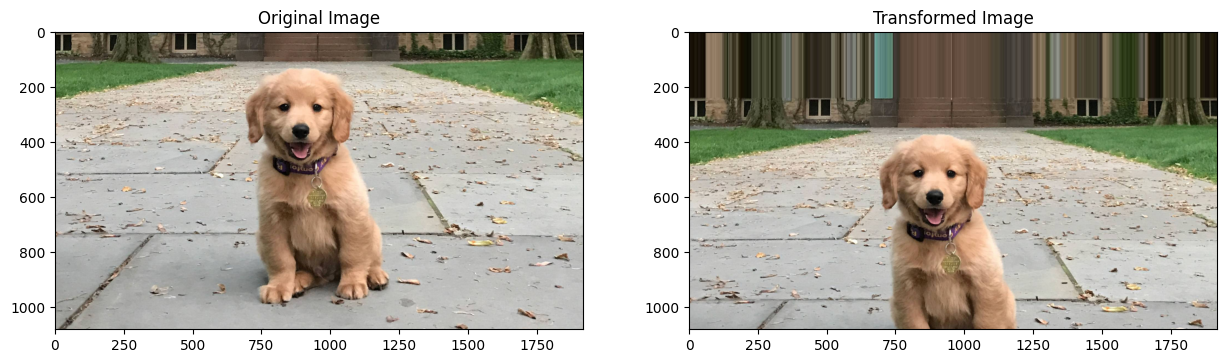

In [27]:
transformed_fn = keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.5)
transformed_array = transformed_fn.random_transform(dog_array)
transformed_image = keras.preprocessing.image.array_to_img(transformed_array)
plot_images(dog_image, transformed_image)

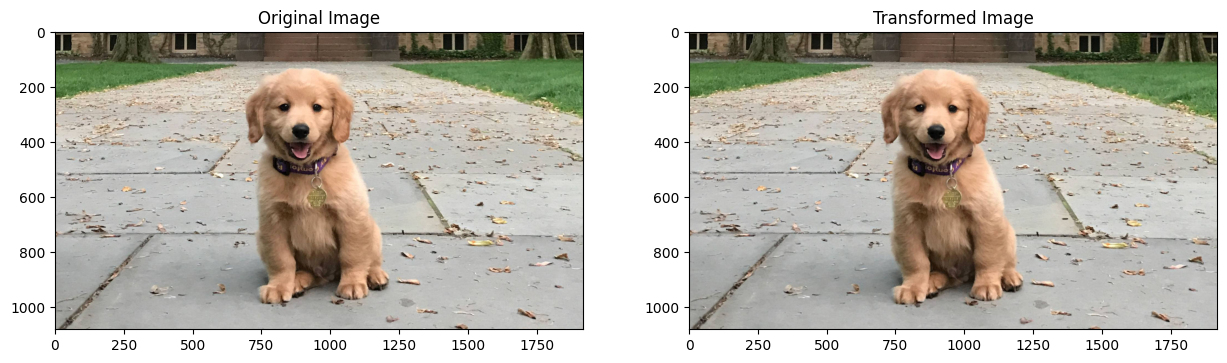

In [28]:
transformed_fn = keras.preprocessing.image.ImageDataGenerator(rotation_range=30)
transformed_array = transformed_fn.random_transform(dog_array)
transformed_image = keras.preprocessing.image.array_to_img(transformed_array)
plot_images(dog_image, transformed_image)

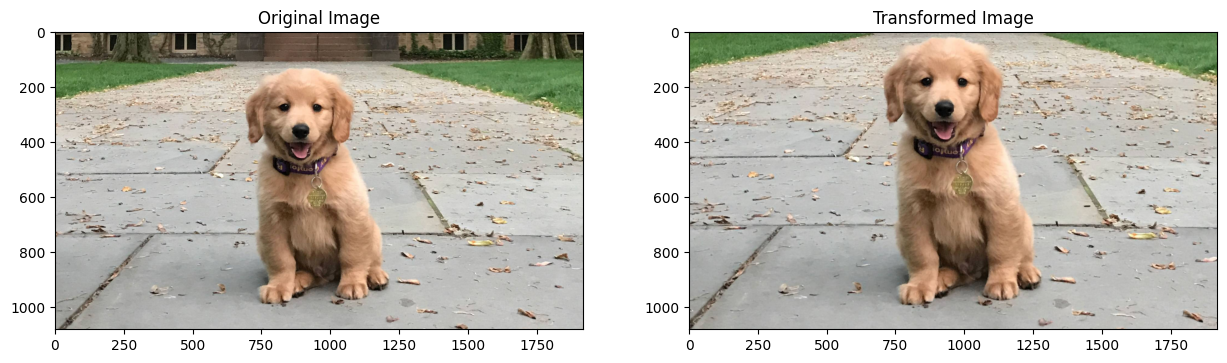

In [35]:
transformed_fn = keras.preprocessing.image.ImageDataGenerator(zoom_range=0.2)
transformed_array = transformed_fn.random_transform(dog_array)
transformed_image = keras.preprocessing.image.array_to_img(transformed_array)
plot_images(dog_image, transformed_image)

In [36]:
augmentation = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.3,
                                  shear_range=0.5, zoom_range=0.2,
                                  horizontal_flip=True, vertical_flip=True, rescale=1./255)

In [37]:
directory = '/content/sample_data'
i = 0

for batch in augmentation.flow(dog, batch_size=1, save_to_dir=directory,
                               save_prefix='image',save_format='png'):
  i +=1
  if i >100:
    break